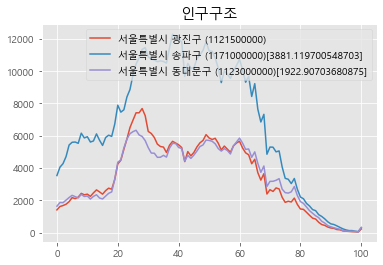

In [25]:
#인구 구조
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from matplotlib import rc

df = pd.read_csv("population.csv", encoding='cp949', header=0, index_col=0)
df = df.iloc[1:,2:] #데이터만 추출
gg = df.index[4]

# 데이터 숫자로 변경
for name, item in df.iterrows():
    for idx, i in item.iteritems():
        df.loc[name, idx] = int(i.replace(",",""))


df = df.drop(df.index[4]) #광진구 삭제
diff = np.zeros(df.shape[0]) #차이 저장 배열
index = 0


for name, item in df.iterrows():
    for idx, i in item.iteritems():
        diff[index] += (i - pop[idx])**2
    index = index + 1

min = diff.argmin()
max = diff.argmax()


min_arr = df.iloc[min].to_numpy()
max_arr = df.iloc[max].to_numpy()
my_arr = pop.to_numpy()

a = df.index[min] + "["+str(np.std(min_arr))+"]"
b = df.index[max] + "["+str(np.std(max_arr))+"]"



matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.style.use('ggplot')
plt.title("인구구조")
plt.plot(my_arr,label = gg)
plt.plot(max_arr,label = b)
plt.plot(min_arr,label = a)
plt.legend()
plt.show()


